# Installing bnlp toolkit and bnltk library

In [1]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 6.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 743 kB 34.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
pip install bnltk

In [3]:
pip install -U bnlp_toolkit

# Importing Library

In [4]:

import gensim
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
! pip install glove-python-binary
from glove import Corpus, Glove

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords
from bnltk.stemmer import BanglaStemmer

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


     |████████████████████████████████| 948 kB 5.3 MB/s 
punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

from bnltk.stemmer import BanglaStemmer

from pandas import read_excel
import re
from re import sub
import multiprocessing

import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D

from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Read dataset

In [6]:
from google.colab import drive
#drive.mount('/content/drive')
dataset=pd.read_csv('/content/Covid vaccine data.csv')


In [7]:
dataset.shape

(418, 2)

Non-urgent: 21900.00%, Urgent: 19900.00%


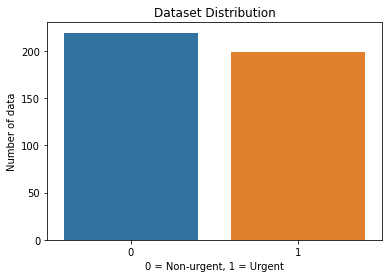

In [8]:
target_vc = dataset["Polarity"].value_counts(normalize=False)
print("Non-urgent: {:.2%}, Urgent: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Dataset Distribution")
plt.xlabel("0 = Non-urgent, 1 = Urgent")
plt.ylabel("Number of data")
plt.show()

# Data Preprocessing

In [9]:
import re
corpus=[]
max=0
for i in range(0,418):
    review = re.sub('[\!"#$%&()*,./:;<=>?@[\\]^`{|}~\t\n।+-]', ' ', dataset['Text'][i])
    review=review.replace('_',' ')
    review=review.replace('ঃ',' ')
    review = re.sub('[a-zA-Z0-9]+', ' ', review)    
    review = re.sub('[''````£|¢|Ñ/=EROero।!“’<>‘॥”‰\'🤓⌚🤰🥺⚽️✌�￰🥀🤣🤡🤗🤐🤦🤔⏩⏹￰]', ' ', review)               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations 
                           u"\\U0001f90f" 
                           u"\\U0001f9cf"
                           u"\U0001fa78"  
                           "]+", flags=re.UNICODE)
    review=emoji_pattern.sub(r'', review)
    #review=str(review)
    #review=review.split()
    '''review=review.replace('A', 'এ')
    review=review.replace('B', 'বি')
    review=review.replace('AB', 'এবি')
    review=review.replace('O', 'ও')
    review=review.replace('+','পজিটিভ')
    review=review.replace('-','নেগেটিভ')'''
    review=review.lower()
    bn_stemmer = BanglaStemmer()
    review=bn_stemmer.stem(review)
    review = remove_stopwords(review, stopwords)
    #review=str(review)
    #review=review.split()
    #review=' '.join(review)
    corpus.append(review)
    if(max<len(review)):
      max=len(review)
print(max)


54


In [ ]:
#corpus

# Feature Selection

In [31]:
! pip install fasttext


     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3128408 sha256=2e97d455c22dea5fdeccfeb9a6ce2e8746702ec4cbd21aaa9c948028b3fbcaa1
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [32]:
from gensim.models.fasttext import FastText

In [33]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2
sg = 1  # CBOW (0) or Skip-gram (1) model

In [34]:
model_fasttext = gensim.models.FastText(corpus,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1)
model_fasttext.build_vocab(corpus,progress_per=100)
model_fasttext.train(corpus,total_examples=model_fasttext.corpus_count,epochs=10)
words=list(model_fasttext.wv.index_to_key)
print(words)

['টিকা', 'ভ্যাক্সিন', 'ডোজ', 'করোনা', 'টিকার', 'ভ্যাকসিন', 'নিন', 'সবাই', 'করুন', 'এখনো', 'দিয়ে', 'হয়ে', 'ভালো', 'বাংলাদেশ', 'করোনার', 'নেয়ার', 'মানুষ', 'নি', 'সমস্যা', 'টাকা', 'দেশে', 'কথা', '২', 'আলহামদুলিল্লাহ', 'কোভিড', 'বাংলাদেশের', 'মাস', 'আক্রান্ত', 'নিবন্ধন', 'সুস্থ', 'থাকুন', 'বুস্টার', 'দেশের', 'দ্বিতীয়', 'ভাল', 'টীকা', 'দ্রুত', 'গ্রহন', 'সবাইকে', 'মেসেজ', 'সম্ভব', 'দেশ', 'হয়নি', 'বিরুদ্ধে', 'মানুষের', 'রেজিস্ট্রেশন', 'দেওয়ার', 'নিলে', 'সরকার', 'দরকার', 'একটা', 'লকডাউন', 'মৃত্যু', '২য়', 'দেয়ার', 'নেয়া', '৫', 'কার্যকর', 'আপনারা', 'দেয়', 'টিকাদান', 'হওয়ার', 'তৈরি', 'একমাত্র', 'ধন্যবাদ', 'পরও', 'মারা', 'শেষ', 'সতর্ক', 'আছি', 'ঝুঁকি', 'থাকলে', 'ভাইরাস', 'কারন', 'খবর', 'রেজিষ্ট্রেশন', 'সাহায্য', 'করেছি', 'আসছে', 'রোগ', 'চাই', 'অবশ্যই', 'যায়', '১', 'দেয়া', 'সময়', 'আওতায়', 'ব্যবস্থাপনা', 'ভয়', 'থাকতে', 'তিন', 'মাস্ক', 'কেন্দ্রে', 'নেওয়ার', 'বন্ধ', 'একটু', 'পেয়েছি', 'এসব', 'আসে', 'এসএমএস', 'পেলাম', 'কম', 'নিয়েছি', 'গ্রহণ', 'জটিলতা', 'ভারত', 'হয়েছে', 'বিশ্ব', 'টিকাই', 'ক্ষমতা', 'সচেতন

In [35]:
model_fasttext.wv.most_similar('রুগীর')
#model.wv.similarity(w1="খারাপ",w2="খারাপ")
#print(model['খারাপ'])

[('সবাই', 0.158265620470047),
 ('থাকুন', 0.15330471098423004),
 ('নিন', 0.15133121609687805),
 ('ভাইরাস', 0.13317054510116577),
 ('সুস্থ', 0.12906625866889954),
 ('সতর্ক', 0.12885859608650208),
 ('করুন', 0.12431930005550385),
 ('প্রতিরোধ', 0.12026209384202957),
 ('ভাল', 0.11790012568235397),
 ('আক্রান্ত', 0.11561371386051178)]

In [36]:

new_dict=dict()
for i in words:
  x=model_fasttext.wv[i]
  average = sum(x) / len(x)
  new_dict[i]=average
#print(new_dict[i])
rows, cols = (len(corpus),max)
arr = [[0 for i in range(cols)] for j in range(rows)]
m=0
for l in range(0, len(corpus)):
    msg = corpus[l]
    #msg = msg.split()
    for j in range(0,len(msg)):
        k=msg[j]
        if k in new_dict:
          arr[l][j]=new_dict[k]


In [37]:
X = arr
y = dataset.iloc[:, 1].values

#SVM with 80:20 spliting

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)



SVC(kernel='linear', random_state=0)

In [40]:
#predicting the Test set results
y_pred=classifier.predict(X_test)




Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1e852b18d0>)

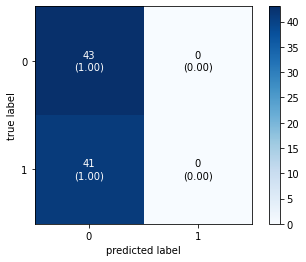

In [41]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [42]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)


Accuracy 0.512
precision 0.000
Recall 0.000
f1_score 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM with 10-fold cross validation

In [43]:
#Applying 10-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True,random_state=0)
# evaluate model
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('Accuracy %.3f'%mean(scores))
print('precision %.3f'%np.mean(precision))
print('Recall %.3f'%np.mean(recall))
print('f1_score %.3f'%np.mean(f1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Accuracy 0.524
precision 0.000
Recall 0.000
f1_score 0.000


# Decision Tree with 80:20 spliting

In [44]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)
print(X)

[[0, 0, 0, 0, 0, -0.001450511447619647, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.011303237327374517, 0, -0.004347721883095801, 0, -0.006006753365509212, 0, 0, 0, 0, -0.006006753365509212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0026741357147693633, 0.008749348324490711, -0.003247959224972874, 0, 0.0025425247754901647, 0, 0.00221768906863872, 0.008749348324490711, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.0025425247754901647, 0.0025653751895879395, 0.0028586103883571925, 0.008749348324490711, 0.001980920492205769, 0, 0.0068526082782773305, 0.0031999032478779556, 0.0042654378188308325, 0.008749348324490711, 0.001980920492205769, 0.0025653751895879395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
# Fitting Decision Tree to the training set
training_accuracy = []
test_accuracy = []
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1e83a2d890>)

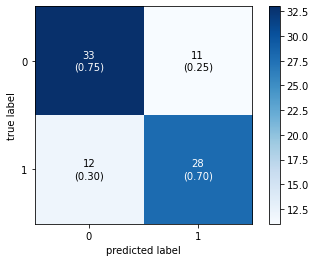

In [46]:
#predicting the Test set results
y_pred=classifier.predict(X_test)


#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [47]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy) 

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)


from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)


Accuracy 0.726
precision 0.718
Recall 0.700
f1_score 0.709


# Decision Tree with 10-fold cross validation

In [48]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True, random_state=0)
# evaluate model
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", random_state=0)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('%.3f'%mean(scores))
print('%.3f'%np.mean(precision))
print('%.3f'%np.mean(recall))
print('%.3f'%np.mean(f1))

0.675
0.653
0.659
0.654


# Naive Bayes with 80:20 spliting

In [49]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)
#print(X)

Confusion Matrix for PassiveAggressiveClassifier
Accuracy 0.476
precision 0.476
Recall 0.975
f1_score 0.639


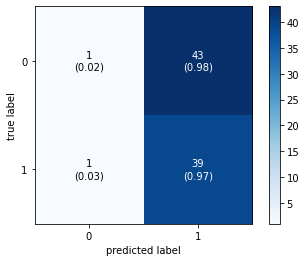

In [50]:
# Fitting SVC to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train, y_train)
#predicting the Test set results
y_pred=classifier.predict(X_test)
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

# Naive Bayes with 10-fold cross validation

In [51]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True, random_state=0)
# evaluate model
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('%.3f'%mean(scores))
print('%.3f'%np.mean(precision))
print('%.3f'%np.mean(recall))
print('%.3f'%np.mean(f1))

0.529
0.532
0.709
0.542


# Random Forest with 80:20 spliting

In [52]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
#print(X)

Confusion Matrix for PassiveAggressiveClassifier
Accuracy 0.714
precision 0.730
Recall 0.659
f1_score 0.692


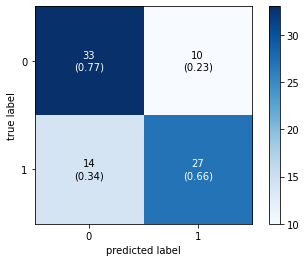

In [53]:
# Fitting Random Forest to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

#predicting the Test set results
y_pred=classifier.predict(X_test)
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

# Random Forest with 10-fold cross validation

In [54]:
#Applying 10-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True, random_state=0)
# evaluate model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('%.3f'%mean(scores))
print('%.3f'%np.mean(precision))
print('%.3f'%np.mean(recall))
print('%.3f'%np.mean(f1))

0.747
0.770
0.667
0.710
